# ПР4 ВИВІДНА СТАТИСТИКА

## Імпортуємо необхідні бібліотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
%matplotlib inline

## Завантажимо дані, та виправимо помилки, які були знайдені при виконанні минулої практичної роботи.

In [2]:
df = pd.read_csv("Data2.csv", delimiter=';', decimal=',', encoding='cp1252').rename(columns={'Populatiion':'Population'})
num_cols = df.select_dtypes(include=np.number)
num_cols.fillna(num_cols.mean(), inplace=True)
df = pd.concat([df.select_dtypes(exclude=np.number), num_cols], axis=1)
df.Area = df.Area.abs()
df['GDP per capita'] = df['GDP per capita'].abs()

In [3]:
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0


## Перевіримо, чи є параметри, що розподілені за нормальним законом.
Спочатку побудуємо гістограми, для наочного прикладу. 
Якщо гістограма має форму дзвона, графік щільності розподілу симетричний і має один пік, то можна припустити, що розподіл параметра близький до нормального.

Text(0.5, 1.0, 'Концентрація чадного газу в країнах')

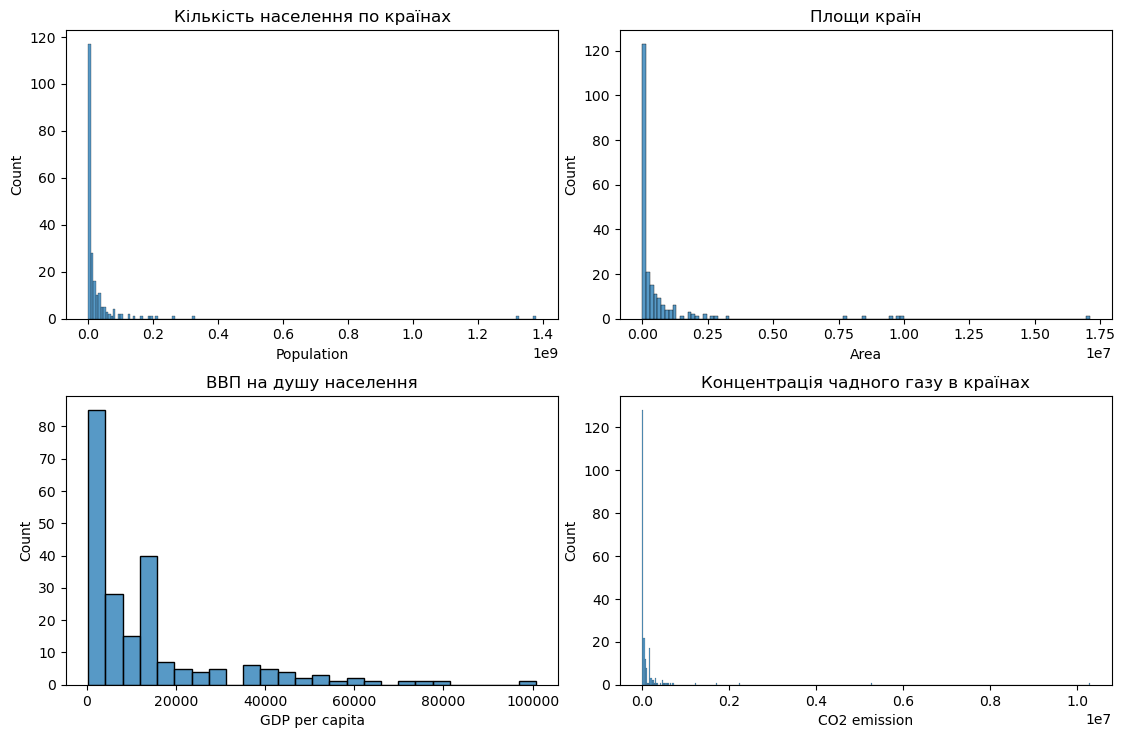

In [4]:
fig, axes = plt.subplots(2,2,figsize=(13.5,8.5))
fig.subplots_adjust(hspace=0.27, wspace=0.125)

sns.histplot(ax=axes[0,0], data=df.Population)
axes[0,0].set_title('Кількість населення по країнах')

sns.histplot(ax=axes[0,1], data=df.Area)
axes[0,1].set_title('Площи країн')

sns.histplot(ax=axes[1,0], data=df['GDP per capita'])
axes[1,0].set_title('ВВП на душу населення')

sns.histplot(ax=axes[1,1], data=df['CO2 emission'])
axes[1,1].set_title('Концентрація чадного газу в країнах')

## Перевіримо гіпотезу за домогою модулю scipy.
І хоча вже на графіках видно, що жоден з параметрів не розподілений нормально, варто переконатися.

In [5]:
from scipy.stats import normaltest

for col in df.columns[2:]:
    stat, p = normaltest(df[col])
    print('Параметр:', col)
    print('W=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Параметр нормально розподілений')
    else:
        print('Параметр НЕ є нормально розподіленим')

Параметр: GDP per capita
W=110.362, p=0.000
Параметр НЕ є нормально розподіленим
Параметр: Population
W=370.214, p=0.000
Параметр НЕ є нормально розподіленим
Параметр: CO2 emission
W=406.218, p=0.000
Параметр НЕ є нормально розподіленим
Параметр: Area
W=284.697, p=0.000
Параметр НЕ є нормально розподіленим


## Перевіримо гіпотезу про рівність середнього і медіани для одного з параметрів.
Оберемо для цього параметр 'Population'.

In [6]:
from scipy.stats import ttest_1samp

p_value = ttest_1samp(df.Population, df.Population.median())[1]

if p_value > 0.05 :
    print(f"Гіпотеза про рівність середнього і медіани для кількості населення є істиною з p_value={p_value}")
else:
    print(f"Гіпотеза про рівність середнього і медіани для кількості населення є помилкою з p_value={p_value}")

Гіпотеза про рівність середнього і медіани для кількості населення є помилкою з p_value=0.0024068842901324447


## Вкажемо, в якому регіоні розподіл викидів СО2 найбільш близький до нормального.

In [7]:
from scipy.stats import shapiro

p = 0
region = None
df_grouped = df.groupby('Region')['CO2 emission']
for reg, emissions in df_grouped:
    p_val = shapiro(emissions)[1]
    if p_val > p:
        p, region = p_val, reg
        
print(f'Регіон, в якому розподіл викидів СО2 найбільш близький до нормального')

Регіон, в якому розподіл викидів СО2 найбільш близький до нормального


## Побудуємо кругову діаграму населення по регіонам

Text(0.5, 1.0, 'Насення по регіонах')

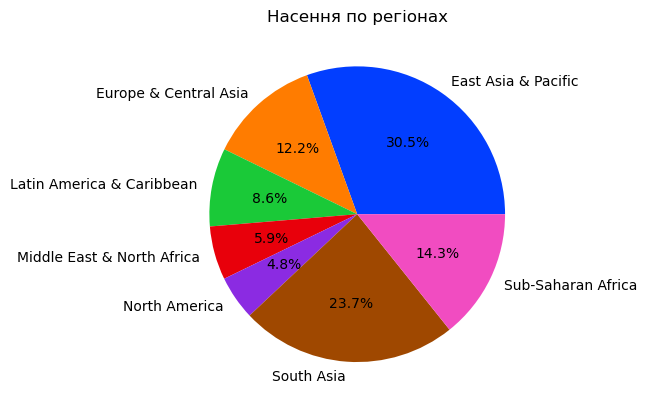

In [8]:
colors = sns.color_palette('bright')
values = df.groupby('Region')['Population'].sum()
labels = values.index

plt.pie(values, labels=labels, colors=colors, autopct='%.1f%%')
plt.title('Насення по регіонах')

## Висновок
При виконанні практичної роботи я ознайомився з методами визначення точкових оцінок параметрів розподілу; дослідити, що впливає на якість точкових оцінок; методикою визначення інтервальних оцінок параметрів розподілу; дослідити, що впливає на якість інтервальних оцінок; При виконанні практичної роботи я ознайомився з методами визначення точкових оцінок параметрів розподілу; дослідити, що впливає на якість точкових оцінок; методикою визначення інтервальних оцінок параметрів розподілу; дослідити, що впливає на якість інтервальних оцінок; 